In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Production = pd.read_csv("Cereal_Production.csv")
Yield = pd.read_csv("Cereal_Yield.csv", skiprows = [1,2,3,4])
master = Production.append(Yeild, ignore_index=True)
master.to_csv('master.csv', index=False)

ParserError: Error tokenizing data. C error: Expected 3 fields in line 5, saw 67


In [ ]:
def get_two_Dfs(master):
    data = pd.read_csv("master.csv")
    year_as_columns = data.drop(['Country Name', 'Country Code','Indicator Name'], axis = 1)
    countries_as_columns = data.T
    countries_as_columns.columns = countries_as_columns.iloc[0]
    countries_as_columns = countries_as_columns.iloc[4:]
    countries_as_columns.rename(columns = {'Country Name':'Year'}, inplace = True)
    return countries_as_columns, year_as_columns

countries, year = get_two_Dfs("master")

In [ ]:
master.head()

In [3]:
temp_1 = master.drop(['Country Code', 'Country Name', 'Indicator Code'], axis = 1)
temp_1['Average'] = temp_1.mean(axis=1)
temp_1 = temp_1[["Indicator Name", "Average"]]
temp = temp_1
temp_1 = temp_1.pivot(columns='Indicator Name', values='Average')
mean_value = temp_1["Cereal production (metric tons)"].mean()
temp_1["Cereal production (metric tons)"] = temp_1["Cereal production (metric tons)"].fillna(value = mean_value)
mean_value = temp_1["Cereal yield (kg per hectare)"].mean()
temp_1["Cereal yield (kg per hectare)"] = temp_1["Cereal yield (kg per hectare)"].fillna(value = mean_value)
temp_1[["Cereal production (metric tons)", "Cereal yield (kg per hectare)"]].corr()

NameError: name 'master' is not defined

In [38]:
temp_2 = master.drop(['Country Code', 'Indicator Code'], axis = 1)
temp_2['Average'] = temp_2.mean(axis=1)
temp_2 = temp_2[temp_2['Country Name'] == 'Angola']
temp_2 = temp_2.T
temp_2.columns = temp_2.iloc[1]
temp_2 = temp_2.iloc[3:]
temp_2 = temp_2.drop(temp_2.tail(1).index) # drop last n rows
temp_2 = temp_2.reset_index()

C:\Users\MUHAMM~1\AppData\Local\Temp/ipykernel_11536/1714673854.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  temp_2['Average'] = temp_2.mean(axis=1)


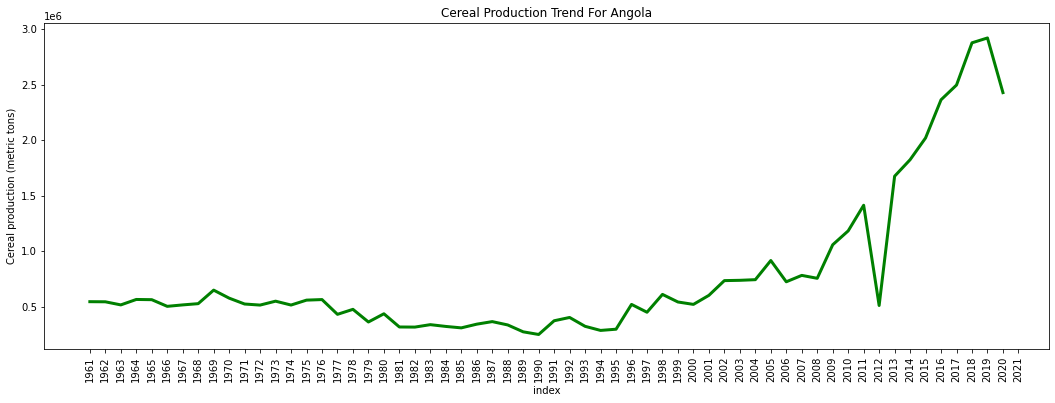

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(18,6))
sns.lineplot(x="index", y="Cereal production (metric tons)",
             data = temp_2, lw = 3, color = "green")
plt.title("Cereal Production Trend For Angola")
plt.xticks(rotation='vertical')
plt.show()

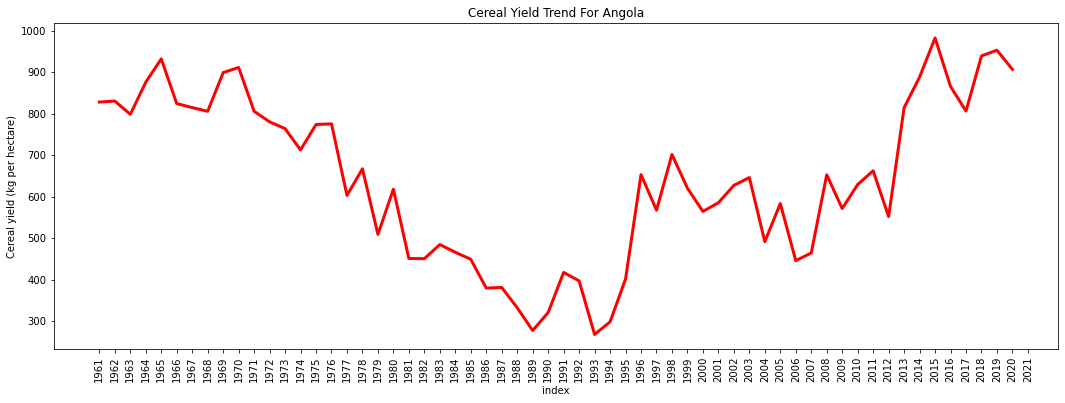

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(18,6))
sns.lineplot(x="index", y="Cereal yield (kg per hectare)",
             data = temp_2, linewidth = 3, color = "red")
plt.title("Cereal Yield Trend For Angola")
plt.xticks(rotation='vertical')
plt.show()

In [41]:
from scipy.stats import ttest_ind
#perform independent two sample t-test
ttest_ind(temp_1['Cereal production (metric tons)'], temp_1['Cereal yield (kg per hectare)'])

Ttest_indResult(statistic=11.960639142277397, pvalue=5.238997363048344e-31)

In [42]:
master.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,Cereal production (metric tons),AG.PRD.CREL.MT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Cereal production (metric tons),AG.PRD.CREL.MT,NaN,17059517.0,17673768.0,18093367.0,16734227.0,17018761.0,...,76507660.0,80427044.0,90152808.0,79223273.0,82273939.0,94106309.0,94650120.0,90200861.0,97955319.0,NaN
2,Afghanistan,AFG,Cereal production (metric tons),AG.PRD.CREL.MT,NaN,3695000.0,3696000.0,3378000.0,3732000.0,3785000.0,...,6379000.0,6520329.0,6748023.0,5808288.0,5532695.0,4894365.0,4134191.0,5583461.0,6025977.0,NaN
3,Africa Western and Central,AFW,Cereal production (metric tons),AG.PRD.CREL.MT,NaN,15199359.0,16249447.0,16419357.0,16367923.0,16309479.0,...,60132437.0,57631047.0,62793664.0,66126114.0,71055876.0,70550388.0,76159885.0,77816712.0,78462572.0,NaN
4,Angola,AGO,Cereal production (metric tons),AG.PRD.CREL.MT,NaN,544000.0,543000.0,515000.0,564000.0,562000.0,...,509545.0,1674598.0,1823231.0,2019544.0,2363287.0,2496354.0,2876750.0,2920433.0,2427955.0,NaN


In [43]:
Production['Average'] = Production.mean(axis = 1)
Production.head()

C:\Users\MUHAMM~1\AppData\Local\Temp/ipykernel_11536/113974687.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Production['Average'] = Production.mean(axis = 1)


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Average
0,Aruba,ABW,Cereal production (metric tons),AG.PRD.CREL.MT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Cereal production (metric tons),AG.PRD.CREL.MT,NaN,17059517.0,17673768.0,18093367.0,16734227.0,17018761.0,...,80427044.0,90152808.0,79223273.0,82273939.0,94106309.0,94650120.0,90200861.0,97955319.0,NaN,4.224170e+07
2,Afghanistan,AFG,Cereal production (metric tons),AG.PRD.CREL.MT,NaN,3695000.0,3696000.0,3378000.0,3732000.0,3785000.0,...,6520329.0,6748023.0,5808288.0,5532695.0,4894365.0,4134191.0,5583461.0,6025977.0,NaN,4.077969e+06
3,Africa Western and Central,AFW,Cereal production (metric tons),AG.PRD.CREL.MT,NaN,15199359.0,16249447.0,16419357.0,16367923.0,16309479.0,...,57631047.0,62793664.0,66126114.0,71055876.0,70550388.0,76159885.0,77816712.0,78462572.0,NaN,3.578020e+07
4,Angola,AGO,Cereal production (metric tons),AG.PRD.CREL.MT,NaN,544000.0,543000.0,515000.0,564000.0,562000.0,...,1674598.0,1823231.0,2019544.0,2363287.0,2496354.0,2876750.0,2920433.0,2427955.0,NaN,7.773415e+05


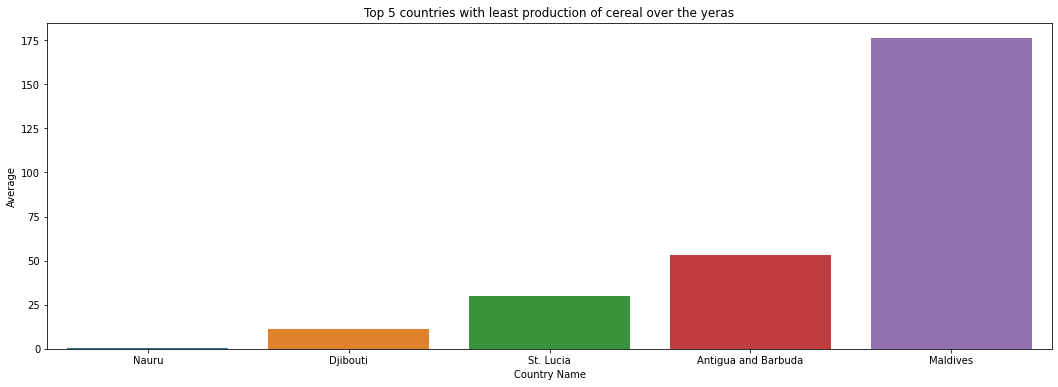

In [44]:
top_5_production_countries = Production[["Country Name", "Average"]]
top_5_production_countries = top_5_production_countries.sort_values(by = ['Average'])
top_5_production_countries = top_5_production_countries.dropna()
top_5_production_countries = top_5_production_countries.head()
plt.figure(figsize=(18,6))
sns.barplot(x = 'Country Name',
            y = 'Average',
            data = top_5_production_countries)
plt.title("Top 5 countries with least production of cereal over the yeras") 
# Show the plot
plt.show()

C:\Users\MUHAMM~1\AppData\Local\Temp/ipykernel_11536/58592054.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Yield['Average'] = Yield.mean(axis = 1)


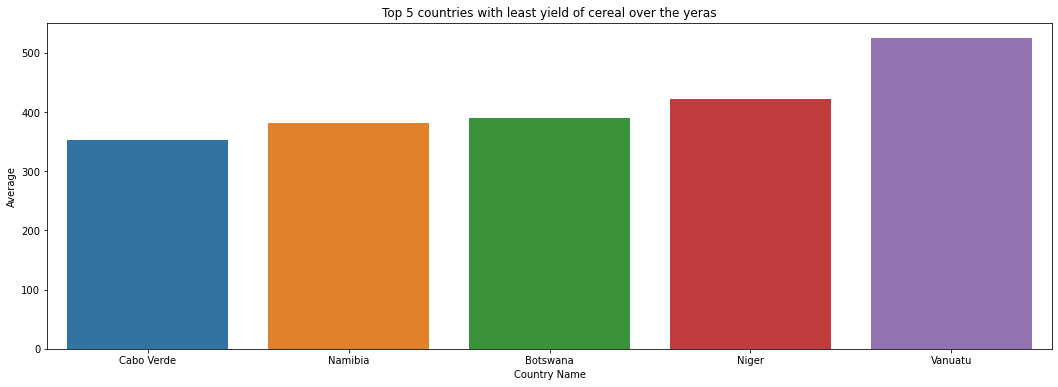

In [47]:
Yield['Average'] = Yield.mean(axis = 1)
top_5_yield_countries = Yield[["Country Name", "Average"]]
top_5_yield_countries = top_5_yield_countries.sort_values(by = ['Average'])
top_5_yield_countries = top_5_yield_countries.dropna()
top_5_yield_countries = top_5_yield_countries.head()
plt.figure(figsize=(18,6))
sns.barplot(x = 'Country Name',
            y = 'Average',
            data = top_5_yield_countries)
plt.title("Top 5 countries with least yield of cereal over the yeras") 
# Show the plot
plt.show()